In [1]:
import pandas as pd
import numpy as np
TR = pd.read_csv(r"train.txt",sep = "\t",header=0)
TE = pd.read_csv(r"test.txt",sep = "\t",header=0)
#读取同一文件夹路径下的txt文件，故不加路径
#r是转义符，防止文件路径的\被转义；不加r时可以把路径的\改为/。本段代码不体现r的作用kkk
 
#sep=','以逗号为分隔符。如txt中1，2，3，python读出为1 2 3
 
#header=None txt的第一行数据作为python读出的第一行数据
#header=0 txt第一行数据作为python读出数据的表格索引；header=1 txt的第二行数据作为索引

In [1]:
def sigmoid(z):
    '''
    输入：加权的输入数据w*x
    功能：执行sigmoid变换
    输出：sigmoid变换值，值域（0,1）
    '''
    return 1.0/(1+np.exp(-z))

In [83]:
TR.to_csv('train.csv',index=False)
TE.to_csv('test.csv',index=False)

In [80]:
del TR

In [6]:
def plotDataSet(path):
    datamat = pd.read_csv(path,sep = "\t",header=0)
    groups=datamat.groupby(datamat.y)
    group_1=groups.get_group(1)
    group_0=groups.get_group(0)
    ax=group_0.plot.scatter(x='X1',y='X2',color='r')
    group_1.plot.scatter(x='X1',y='X2',color='b',ax=ax)

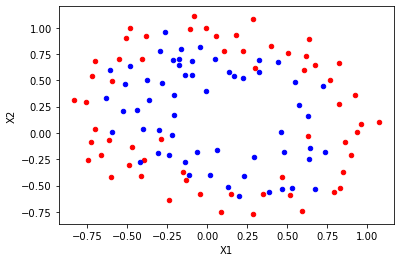

In [7]:
plotDataSet('train.txt')

In [84]:
train_x1 = TR.X1
train_x2 = TR.X2
train_x1_seq= train_x1**2
train_x2_seq= train_x2**2
label = TR.y

In [107]:
weights=np.ones([5,1])
weights

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
a=np.array([train_x1,train_x2])
a.shape

In [110]:
TR_5D=TR.copy()


In [111]:
TR_5D['x1_seq']=train_x1_seq
TR_5D['x2_seq']=train_x2_seq
TR_5D['常数']=1
del TR_5D['y']


In [112]:
TR_5D=TR_5D[['常数','X1','X2','x1_seq','x2_seq']]

In [113]:
np_TR_5D= np.array(TR_5D)
np_TR_5D.shape

(118, 5)

In [ ]:

n,m = np.shape(dataMatrix)
alpha = 0.01#梯度算法的步长，可以控制收敛的速度以及最后模型的精度
maxCycles = 500#批处理，权值跟新的最大次数
weights = np.ones((m,1))*0.01 #初始化权值，权值个数等于特征个数（包括常数项1）
for k in range(maxCycles):
    predictLabel = sigmoid(np_TR_5D*weights)
    error = (labelMatrix - predictLabel)
     #计算梯度
    gradient = dataMatrix.transpose() * error
    #更新权重
    weights = weights +alpha * gradient
